
---

### ✅ Fonction ReLU :

**Définir la fonction ReLU** *(Rectified Linear Unit)* :

$$
\text{ReLU}(z) = \max(0, z)
$$

C’est une fonction d’activation très utilisée dans les réseaux de neurones profonds en raison de sa simplicité et de son efficacité. Elle renvoie :

* la **valeur d'entrée** si elle est **positive ou nulle**,
* **zéro** si elle est **négative**.

---

**Ce graphique montre :**

* L’effet de la **fonction ReLU** appliquée aux sorties `Z = WX + b`.
* Les valeurs négatives de `Z` sont écrasées à **zéro**, tandis que les positives sont **conservées**.
* Une **courbe anguleuse** qui reste à zéro pour \$z < 0\$ puis croît linéairement pour \$z \geq 0\$.
* Des **traits rouges pointillés** illustrant la projection verticale de chaque valeur de `Z` sur sa valeur activée.
* Des **points cyan** indiquant les activatios comparer visuellement ?


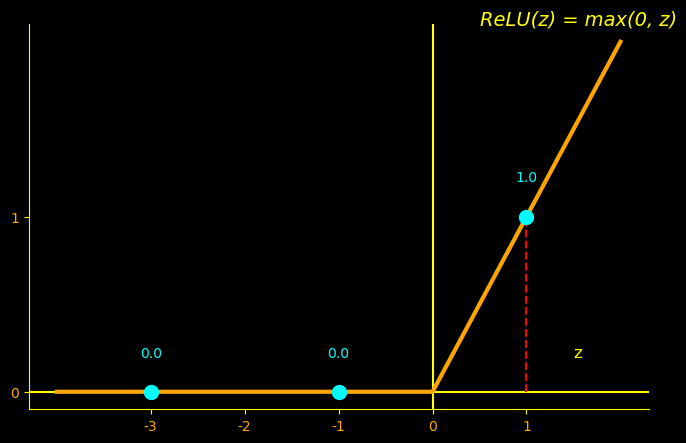

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fonction ReLU
def relu(x):
    return np.maximum(0, x)

# === 1. Chargement des matrices depuis le fichier Excel ===
file_path = "exercice1_pr.xlsx"

# Lecture sans en-têtes textuels
W = pd.read_excel(file_path, sheet_name='W', header=None, skiprows=1).values
X = pd.read_excel(file_path, sheet_name='X', header=None, skiprows=1).values
b = pd.read_excel(file_path, sheet_name='b', header=None, skiprows=1).values

# === 2. Calcul : Z = WX + b ===
Z = np.dot(W, X) + b
Z = Z.flatten()
Y = relu(Z)

# === 3. Graphique ReLU appliqué à Z ===
fig, ax = plt.subplots(figsize=(8, 5))

# Lignes des axes en jaune
ax.axhline(0, color='yellow', linewidth=1.5)
ax.axvline(0, color='yellow', linewidth=1.5)

# Tracé de la courbe ReLU
x_curve = np.linspace(min(Z)-1, max(Z)+1, 400)
y_curve = relu(x_curve)
ax.plot(x_curve, y_curve, color='orange', linewidth=3, label='ReLU(z)')

# Affichage des points spécifiques
ax.scatter(Z, Y, color='cyan', zorder=5, s=100)
for point, val in zip(Z, Y):
    ax.plot([point, point], [0, val], color='red', linestyle='--', linewidth=1.5)
    ax.text(point, val + 0.2, f'{val:.1f}', ha='center', color='cyan', fontsize=10)

# Annotation explicative
left_x = min(Z) + 3.5  # Décalage à gauche
ax.text(left_x, max(Y) * 0.8+1.3, 'ReLU(z) = max(0, z)', fontsize=14, color='yellow', style='italic')

#ax.text(-0.3, -0.8, '0', fontsize=12, color='yellow')
ax.text(max(Z) + 0.5, 0.2, 'z', fontsize=12, color='yellow')

# Style graphique
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Étiquettes personnalisées des axes
xticks_range = np.arange(int(np.floor(min(Z))), int(np.ceil(max(Z))) + 1)
yticks_range = np.arange(0, int(np.ceil(max(Y))) + 1)

ax.set_xticks(xticks_range)
ax.set_yticks(yticks_range)
ax.set_xticklabels([str(i) for i in xticks_range], color='orange')
ax.set_yticklabels([str(i) for i in yticks_range], color='orange')

plt.show()



---

### ✅ Fonction Sigmoid :

**Définir la fonction sigmoïde** :

$$
\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

La fonction sigmoïde est une fonction d’activation **continue**, **dérivable**, et **bornée**. Elle transforme n’importe quelle valeur réelle en un résultat compris entre **0 et 1**, ce qui la rend particulièrement utile pour :

* les **modèles de classification binaire**,
* et pour représenter une **probabilité**.

---

**Ce graphique montre :**

* L’effet de la **fonction sigmoïde** appliquée aux sorties `Z = WX + b`.
* Une **courbe en "S" douce et croissante** indiquant une transition progressive entre la sortie minimale (0) et maximale (1).
* Les valeurs de `Z` sont compressées dans l’intervalle **\[0, 1]**, même les valeurs extrêmes.
* Des **traits rouges pointillés** projetant chaque `Z` sur sa sortie activée `Sigmoid(Z)`.
* Des **points cyan** représentant les activations calculées.
* Un **style graphique épuré et visuellement cohérent** : fond noir, courbe verte) (`sig courbes sur la même figure ?


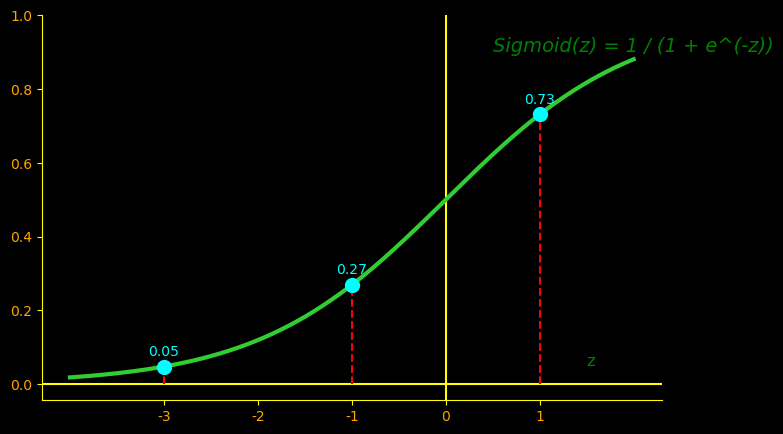

In [151]:
# Fonction Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# === 1. Chargement des matrices depuis le fichier Excel ===
file_path = "exercice1_pr.xlsx"

# Lecture sans en-têtes textuels
W = pd.read_excel(file_path, sheet_name='W', header=None, skiprows=1).values
X = pd.read_excel(file_path, sheet_name='X', header=None, skiprows=1).values
b = pd.read_excel(file_path, sheet_name='b', header=None, skiprows=1).values

# === 2. Calcul : Z = WX + b ===
Z = np.dot(W, X) + b
Z = Z.flatten()
Y = sigmoid(Z)

# === 3. Graphique Sigmoid appliqué à Z ===
fig, ax = plt.subplots(figsize=(8, 5))

# Lignes des axes en jaune
ax.axhline(0, color='yellow', linewidth=1.5)
ax.axvline(0, color='yellow', linewidth=1.5)

# Tracé de la courbe Sigmoid
x_curve = np.linspace(min(Z)-1, max(Z)+1, 400)
y_curve = sigmoid(x_curve)
ax.plot(x_curve, y_curve, color='limegreen', linewidth=3, label='Sigmoid(z)')

# Affichage des points spécifiques
ax.scatter(Z, Y, color='cyan', zorder=5, s=100)
for point, val in zip(Z, Y):
    ax.plot([point, point], [0, val], color='red', linestyle='--', linewidth=1.5)
    ax.text(point, val + 0.03, f'{val:.2f}', ha='center', color='cyan', fontsize=10)

# Annotation explicative
ax.text(0.5, 0.9, 'Sigmoid(z) = 1 / (1 + e^(-z))', fontsize=14, color='green', style='italic')
#ax.text(-0.3, -0.1, '0', fontsize=12, color='yellow')
ax.text(max(Z) + 0.5, 0.05, 'z', fontsize=12, color='green')

# Style graphique
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Étiquettes personnalisées des axes
xticks_range = np.arange(int(np.floor(min(Z))), int(np.ceil(max(Z))) + 1)
yticks = np.linspace(0, 1, 6)

ax.set_xticks(xticks_range)
ax.set_yticks(yticks)
ax.set_xticklabels([str(i) for i in xticks_range], color='orange')
ax.set_yticklabels([f'{i:.1f}' for i in yticks], color='orange')

plt.show()


---

## ✅ Markdown pour la fonction **Tanh**

### 🔢 Définition mathématique :

La fonction **tanh** est définie comme :

$$
\tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
$$

Elle est aussi équivalente à :

$$
\tanh(z) = \frac{2}{1 + e^{-2z}} - 1
$$

---

### 🔍 Propriétés :

| Caractéristique        | Valeur                                                     |   |                                                            |
| ---------------------- | ---------------------------------------------------------- | - | ---------------------------------------------------------- |
| **Domaine d’entrée**   | $z \in \mathbb{R}$                                         |   |                                                            |
| **Plage de sortie**    | $[-1, 1]$                                                  |   |                                                            |
| **Forme de la courbe** | Sigmoïde centrée en 0, en "S"                              |   |                                                            |
| **Avantages**          | Centrée sur zéro → meilleure convergence dans certains cas |   |                                                            |
| **Inconvénients**      | Saturation pour (                                          | z | ) grand (proche de ±1), ce qui cause des gradients faibles |

---

### 📈 Le graphique montre :

* Une **courbe verte en "S" centrée** (tanh), croisant l’origine.
* Des **points cyan** correspondant à la sortie tanh des valeurs $Z = WX + b$.
* Des **projections rouges verticales** de chaque point $Z \rightarrow \tanh(Z)$.
* Une **annotation en haut à gauche** du graphique : $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
* Un **fond noir**, des **axes jaunes**, et un **style cohérent** avec les graphes précédents (ReLU et Sigmoid).

---

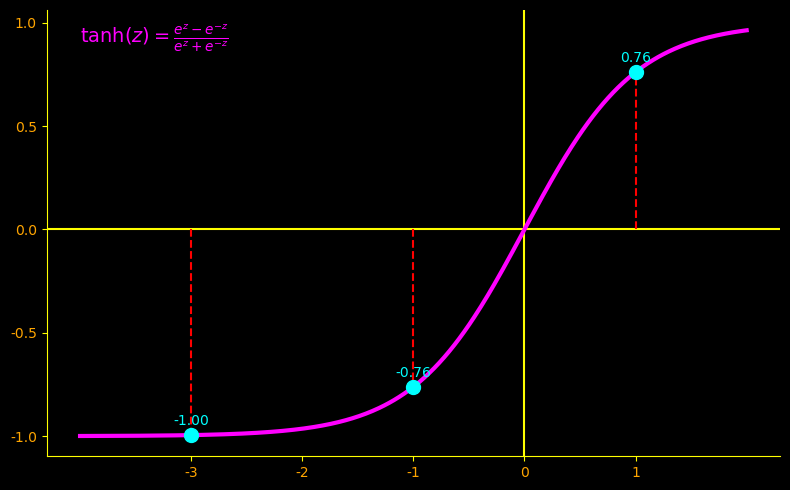

In [176]:
# Fonction tanh
def tanh(x):
    return np.tanh(x)

# === 1. Chargement des matrices depuis le fichier Excel ===
file_path = "exercice1_pr.xlsx"

W = pd.read_excel(file_path, sheet_name='W', header=None, skiprows=1).values
X = pd.read_excel(file_path, sheet_name='X', header=None, skiprows=1).values
b = pd.read_excel(file_path, sheet_name='b', header=None, skiprows=1).values

# === 2. Calcul Z = WX + b ===
Z = np.dot(W, X) + b
Z = Z.flatten()
Y = tanh(Z)

# === 3. Graphique tanh appliqué à Z ===
fig, ax = plt.subplots(figsize=(8, 5))

# Axes jaunes
ax.axhline(0, color='yellow', linewidth=1.5)
ax.axvline(0, color='yellow', linewidth=1.5)

# Courbe tanh
x_curve = np.linspace(min(Z) - 1, max(Z) + 1, 400)
y_curve = tanh(x_curve)
ax.plot(x_curve, y_curve, color='magenta', linewidth=3, label='Tanh(z)')

# Points projetés
ax.scatter(Z, Y, color='cyan', s=100, zorder=5)
for point, val in zip(Z, Y):
    ax.plot([point, point], [0, val], color='red', linestyle='--', linewidth=1.5)
    ax.text(point, val + 0.05, f'{val:.2f}', ha='center', color='cyan', fontsize=10)

# Annotation à gauche
left_x = min(Z) - 1
ax.text(left_x, 0.9, r'$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$', 
        fontsize=14, color='magenta', style='italic')

# Style graphique
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')

# Axes personnalisés
xticks_range = np.arange(int(np.floor(min(Z))), int(np.ceil(max(Z))) + 1)
ax.set_xticks(xticks_range)
ax.set_xticklabels([str(i) for i in xticks_range], color='orange')

yticks_range = np.linspace(-1, 1, 5)
ax.set_yticks(yticks_range)
ax.set_yticklabels([f'{i:.1f}' for i in yticks_range], color='orange')

# Titre
#ax.set_title("Activation par la fonction Tanh", fontsize=14, color='white')

plt.tight_layout()
plt.show()






---

### 📈 Graphique combiné : ReLU vs Sigmoid vs Tanh

Ce graphique affiche simultanément les trois fonctions d'activation **ReLU**, **Sigmoid** et **Tanh** appliquées aux valeurs de sortie $Z = WX + b$, sur **un seul et même plan visuel** :

---

#### 🎨 Trois courbes continues :

* 🟢 **Sigmoid** : tracée en **limegreen**, représentant une **courbe en "S" douce**, bornée dans $[0, 1]$.
* 🟧 **ReLU** : tracée en **orange**, formant une **courbe anguleuse** qui reste à 0 pour les valeurs négatives et croît linéairement pour les positives.
* 🟣 **Tanh** : tracée en **magenta**, représentant une **courbe en "S" centrée en 0**, bornée dans $[-1, 1]$.

---

#### 🔹 Trois types de points projetés :

* <span style="color:cyan; font-size:35px;">●</span> **Sigmoid** : points en **cercles cyan**, représentant les activations sigmoidées individuelles.
* 🟦 **ReLU** : points en **carrés bleu clair**, représentant les activations 
* <span style="color:violet; font-size:30px;">◆</span> **Sigmoid** : points en **losanges violets**, représentant les activations Tanh.Rt les activations Tanh.

---

#### 📌 Autres éléments du graphique :

* 📍 **Traits verticaux rouges pointillés** : indiquent la projection de chaque valeur $Z$ sur sa valeur activée selon la fonction correspondante.
* 🖤 **Fond noir** : optimise le contraste visuel pour une meilleure lisibilité.
* 🟨 **Axes et graduations en jaune** : assurent un style graphique uniforme et clair.
* 🏷️ **Textes d'annotation colorés** : rappellent les formules de chaque fonction d’activation directement dans le graphique.
* 🧭 **Légende claire** : identifie chaque courbe et chaque typ-### 🎯 Utilité de chaque fonction :
* ✅ une fonction **probabiliste douce** : **Sigmoid**, utile pour la classification binaire.
* ✅ une fonction **rapide et efficace** : **ReLU**, très utilisée dans les réseaux de neurones profonds.
* ✅ une fonction **centrée sur zéro** : **Tanh**, souvent préférée lorsque les données ont des vitive pour ce contenu combiné ?


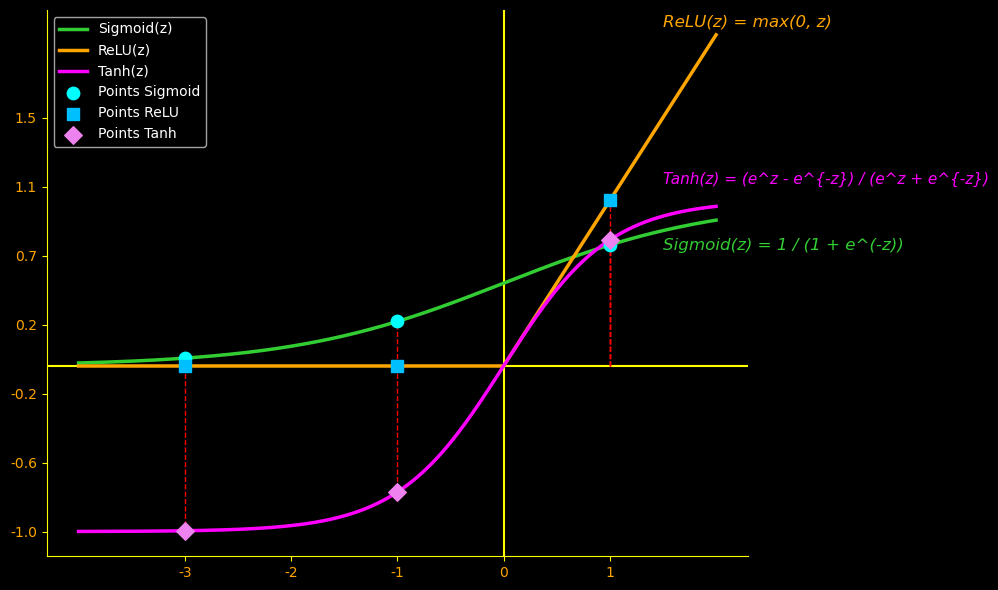

In [178]:
# Fonctions d'activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# === 1. Chargement des matrices depuis le fichier Excel ===
file_path = "exercice1_pr.xlsx"

W = pd.read_excel(file_path, sheet_name='W', header=None, skiprows=1).values
X = pd.read_excel(file_path, sheet_name='X', header=None, skiprows=1).values
b = pd.read_excel(file_path, sheet_name='b', header=None, skiprows=1).values

# === 2. Calcul Z = WX + b ===
Z = np.dot(W, X) + b
Z = Z.flatten()

# === 3. Calcul des activations ===
Y_sigmoid = sigmoid(Z)
Y_relu = relu(Z)
Y_tanh = tanh(Z)

# === 4. Graphique combiné ===
fig, ax = plt.subplots(figsize=(10, 6))

# Axes jaunes
ax.axhline(0, color='yellow', linewidth=1.5)
ax.axvline(0, color='yellow', linewidth=1.5)

# Courbes continues
x_curve = np.linspace(min(Z) - 1, max(Z) + 1, 400)
ax.plot(x_curve, sigmoid(x_curve), color='limegreen', linewidth=2.5, label='Sigmoid(z)')
ax.plot(x_curve, relu(x_curve), color='orange', linewidth=2.5, label='ReLU(z)')
ax.plot(x_curve, tanh(x_curve), color='magenta', linewidth=2.5, linestyle='-', label='Tanh(z)')

# Points Sigmoid
ax.scatter(Z, Y_sigmoid, color='cyan', zorder=5, s=80, label='Points Sigmoid')
for point, val in zip(Z, Y_sigmoid):
    ax.plot([point, point], [0, val], color='red', linestyle='--', linewidth=1)

# Points ReLU
ax.scatter(Z, Y_relu, color='deepskyblue', zorder=5, s=80, label='Points ReLU', marker='s')
for point, val in zip(Z, Y_relu):
    ax.plot([point, point], [0, val], color='red', linestyle='--', linewidth=1)

# Points Tanh
ax.scatter(Z, Y_tanh, color='violet', zorder=5, s=80, label='Points Tanh', marker='D')
for point, val in zip(Z, Y_tanh):
    ax.plot([point, point], [0, val], color='red', linestyle='--', linewidth=1)

# Annotations à gauche
# Annotations explicatives
left_x_s = min(Z) + 4.5  # Un peu à gauche de la plus petite valeur
left_x_r = min(Z) + 4.5
left_x_t = min(Z) + 4.5
ax.text(left_x_s, 0.7, 'Sigmoid(z) = 1 / (1 + e^(-z))', fontsize=12, color='limegreen', style='italic')
ax.text(left_x_r, 2.05, 'ReLU(z) = max(0, z)', fontsize=12, color='orange', style='italic')

ax.text(left_x_t, 1.1, r'Tanh(z) = (e^z - e^{-z}) / (e^z + e^{-z})', fontsize=11, color='magenta', style='italic')

# Style visuel
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Axes personnalisés
xticks_range = np.arange(int(np.floor(min(Z))), int(np.ceil(max(Z))) + 1)
ax.set_xticks(xticks_range)
ax.set_xticklabels([str(i) for i in xticks_range], color='orange')

yticks_range = np.linspace(-1, max(max(Y_sigmoid), max(Y_relu), 1) + 0.5, 7)
ax.set_yticks(yticks_range)
ax.set_yticklabels([f'{i:.1f}' for i in yticks_range], color='orange')

# Légende
ax.legend(loc='upper left', fontsize=10, facecolor='black', labelcolor='white')

# Titre
#ax.set_title("Comparaison des fonctions d'activation : Sigmoid vs ReLU vs Tanh", fontsize=14, color='white')

plt.tight_layout()
plt.show()
